http://www.nest-simulator.org/part-1-neurons-and-simple-neural-networks/

In [1]:
import nest
dir(nest)
nest.Models()

(u'ac_generator',
 u'aeif_cond_alpha_RK5',
 u'amat2_psc_exp',
 u'cont_delay_synapse',
 u'cont_delay_synapse_hpc',
 u'cont_delay_synapse_lbl',
 u'correlation_detector',
 u'correlomatrix_detector',
 u'correlospinmatrix_detector',
 u'dc_generator',
 u'gamma_sup_generator',
 u'gap_junction',
 u'gap_junction_lbl',
 u'gif_psc_exp',
 u'gif_psc_exp_multisynapse',
 u'ginzburg_neuron',
 u'ht_synapse',
 u'ht_synapse_hpc',
 u'ht_synapse_lbl',
 u'iaf_chs_2007',
 u'iaf_neuron',
 u'iaf_psc_alpha',
 u'iaf_psc_alpha_canon',
 u'iaf_psc_alpha_multisynapse',
 u'iaf_psc_alpha_presc',
 u'iaf_psc_delta',
 u'iaf_psc_delta_canon',
 u'iaf_psc_exp',
 u'iaf_psc_exp_multisynapse',
 u'iaf_psc_exp_ps',
 u'iaf_tum_2000',
 u'izhikevich',
 u'mat2_psc_exp',
 u'mcculloch_pitts_neuron',
 u'mip_generator',
 u'multimeter',
 u'noise_generator',
 u'parrot_neuron',
 u'parrot_neuron_ps',
 u'poisson_generator',
 u'poisson_generator_ps',
 u'pp_pop_psc_delta',
 u'pp_psc_delta',
 u'ppd_sup_generator',
 u'pulsepacket_generator',
 u'

type iaf_psc_alpha. This neuron is an integrate-and-fire neuron with alpha-shaped postsynaptic currents

In [2]:
import pylab 
import nest
neuron = nest.Create('iaf_psc_alpha')

In [3]:
nest.GetStatus(neuron)

({u'C_m': 250.0,
  u'Ca': 0.0,
  u'E_L': -70.0,
  u'I_e': 0.0,
  u'V_m': -70.0,
  u'V_min': -inf,
  u'V_reset': -70.0,
  u'V_th': -55.0,
  u'archiver_length': 0,
  u'beta_Ca': 0.001,
  u'element_type': <SLILiteral: neuron>,
  u'frozen': False,
  u'global_id': 1,
  u'local': True,
  u'local_id': 1,
  u'model': <SLILiteral: iaf_psc_alpha>,
  u'node_uses_wfr': False,
  u'parent': 0,
  u'recordables': (<SLILiteral: I_syn_ex>,
   <SLILiteral: I_syn_in>,
   <SLILiteral: V_m>,
   <SLILiteral: weighted_spikes_ex>,
   <SLILiteral: weighted_spikes_in>),
  u'supports_precise_spikes': False,
  u'synaptic_elements': {},
  u't_ref': 2.0,
  u't_spike': -1.0,
  u'tau_Ca': 10000.0,
  u'tau_m': 10.0,
  u'tau_minus': 20.0,
  u'tau_minus_triplet': 110.0,
  u'tau_syn_ex': 2.0,
  u'tau_syn_in': 2.0,
  u'thread': 0,
  u'thread_local_id': -1,
  u'vp': 0},)

In [4]:
nest.GetStatus(neuron, "I_e")

(0.0,)

In [5]:
nest.GetStatus(neuron, ["V_reset", "V_th"])

((-70.0, -55.0),)

In [6]:
nest.SetStatus(neuron,{'I_e':376.0})

Create a multimetr

In [7]:
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter,{"withtime":True,
                           "record_from":["V_m"]})

Create a spikedetector

In [8]:
spikedetector = nest.Create("spike_detector",
                           params={"withgid": True,
                                   "withtime": True})

Connecting nodes with default connections

In [9]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

In [10]:
nest.Simulate(1000.0)

In [11]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
#print dmm

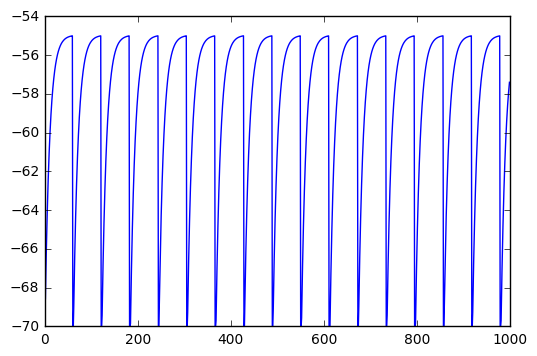

In [12]:
%matplotlib inline
import pylab
pylab.figure(1)
pylab.plot(ts,Vms)

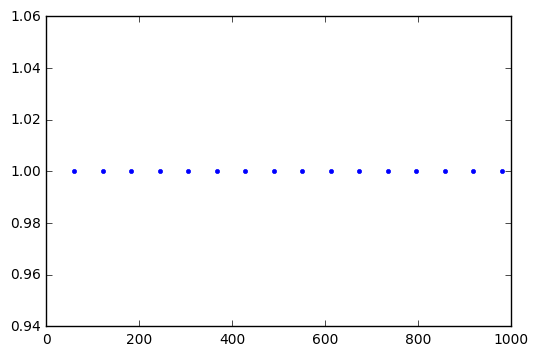

In [13]:
dSD = nest.GetStatus(spikedetector,keys='events')[0]
evs = dSD['senders']
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts,evs,'.')
#print dSD

#### Create an extra neuron

In [16]:
neuron2 = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron2,{"I_e":370.0})

In [17]:
nest.Connect(multimeter, neuron2)

In [27]:
dmm2 = nest.GetStatus(multimeter)[0]
Vms1 = dmm["events"]["V_m"][::2]

In [28]:
ts1 = dmm2["events"]["times"][::2]

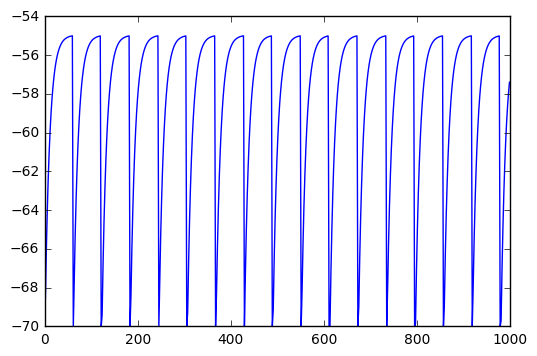

In [29]:
pylab.plot(ts1,Vms1)

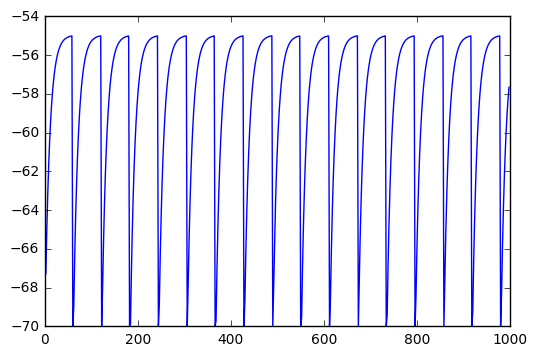

In [30]:
Vms2 = dmm2["events"]["V_m"][1::2]
ts2 = dmm2['events']['times'][1::2]
pylab.plot(ts2,Vms2)

In [34]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
nest.SetStatus(noise_ex, {"rate": 80000.0})
nest.SetStatus(noise_in, {"rate": 15000.0})

In [35]:
nest.SetStatus(neuron, {"I_e": 0.0})

In [42]:
noise = [noise_ex,noise_in]
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
#nest.Connect([noise[0]], neuron, syn_spec=syn_dict_ex)
#nest.Connect([noise[1]], neuron, syn_spec=syn_dict_in)

#### Two connected neurons

In [58]:
import pylab
import nest
neuron1 = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron1,{"I_e": 376.0})
neuron2 = nest.Create("iaf_psc_alpha")
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, 
                            "record_from":["V_m"]})
nest.Simulate(1000.0)

In [59]:
nest.Connect(neuron1, neuron2, syn_spec = {"weight":20.0})
nest.Connect(multimeter, neuron2)

In [60]:
    nest.Connect(neuron1, neuron2, syn_spec={"weight":20, "delay":1.0})

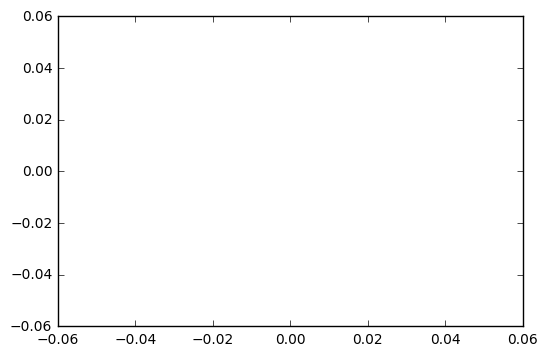

In [57]:
dmm2 = nest.GetStatus(multimeter)[0]
Vms1 = dmm2["events"]["V_m"][::2]
ts1 = dmm2["events"]["times"][::2]
pylab.plot(ts1,Vms1)